### 7.1 선형판별분석법과 이차판별분석법
이차판별분석법

In [10]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


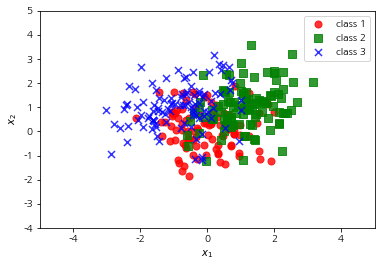

In [15]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [6]:
# 각 클래스 k의 사전확률
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [7]:
# 각 클래스  k 에서  x 의 기댓값 벡터  μk 의 추정치 벡터
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [8]:
# 각 클래스  k 에서  x 의 공분산 행렬  Σk 의 추정치 행렬. 
# (생성자 인수 store_covariance 값이 True인 경우에만 제공)
# sigma1 구한것
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [9]:
# sigma2 구한것
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [10]:
# p(2,-1|y=1),p(2,-1|y=2),p(2,-1|y=3)
# 가능도를 구한것,,
# priors는 1/3으로 동일하게 줬었음 
rv1=sp.stats.multivariate_normal(X1.mean(axis=0),np.cov(X1.T))
rv2=sp.stats.multivariate_normal(X2.mean(axis=0),np.cov(X2.T))
rv3=sp.stats.multivariate_normal(X3.mean(axis=0),np.cov(X3.T))
rv1.pdf([2,-1]),rv2.pdf([2,-1]),rv3.pdf([2,-1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

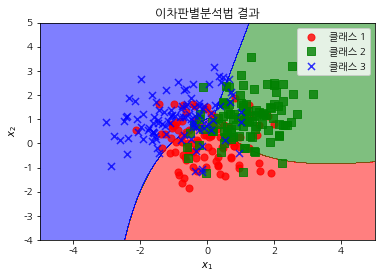

In [11]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()

#### label_binarize
OvR ROC커브를 그릴때 사용할 수 있는 원핫인코딩 함수

In [18]:
from sklearn.preprocessing import label_binarize

In [16]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [19]:
label_binarize(y,[0,1,2])
# y->y1 y2 y3 로 쪼개줌 
# y1 0인지 아닌지
# y2 1인지 아닌지
# y3 2인지 아닌지

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

#### iris데이터를 QDA로 분석

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

In [23]:
iris=load_iris()
x=iris.data
y=label_binarize(iris.target,[0,1,2])

In [37]:
# None이 세개 들어있는 리스트를 만듦
fpr=[None]*3
tpr=[None]*3
thr=[None]*3

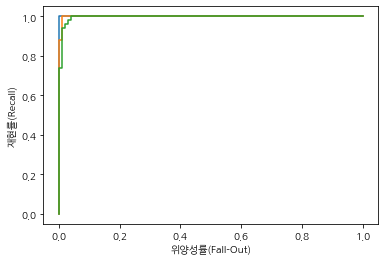

In [39]:
for i in range(3):
    model=QuadraticDiscriminantAnalysis().fit(x,y[:,i])
    fpr[i],tpr[i],thr[i]=roc_curve(y[:,i],model.predict_proba(x)[:,1])
    plt.plot(fpr[i],tpr[i])

plt.xlabel("위양성률(Fall-Out)")
plt.ylabel("재현률(Recall)")
plt.show()

In [40]:
fpr

[array([0.  , 0.  , 0.  , 0.6 , 0.62, 1.  ]),
 array([0.  , 0.  , 0.  , 0.01, 0.01, 0.19, 0.21, 1.  ]),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03,
        0.04, 0.04, 1.  ])]

### 선형판별분석법

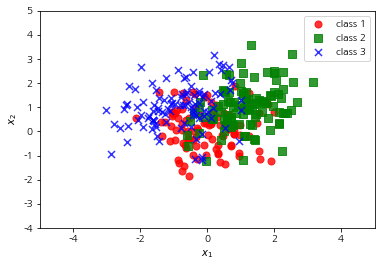

In [47]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
# component써줘야함 근데 교재에는 3으로 되어있었는데 안돌아가서 2로함
lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", store_covariance=True).fit(X, y)

In [51]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [52]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

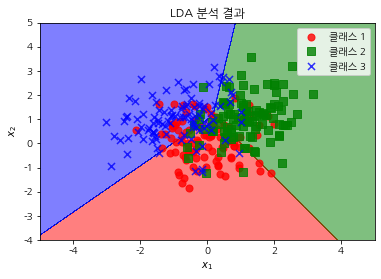

In [54]:
# 결과
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

#### iris데이터를 LDA로 분석

In [56]:
iris=load_iris()
x=iris.data
y=label_binarize(iris.target,[0,1,2])

In [57]:
# None이 세개 들어있는 리스트를 만듦
fpr=[None]*3
tpr=[None]*3
thr=[None]*3

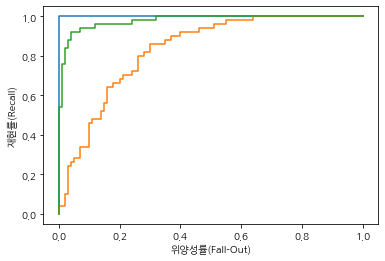

In [60]:
for i in range(3):
    model=LinearDiscriminantAnalysis( solver="svd", store_covariance=True).fit(x,y[:,i])
    fpr[i],tpr[i],thr[i]=roc_curve(y[:,i],model.predict_proba(x)[:,1])
    plt.plot(fpr[i],tpr[i])

plt.xlabel("위양성률(Fall-Out)")
plt.ylabel("재현률(Recall)")
plt.show()

In [67]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [68]:
print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [69]:
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]], dtype=int64)

### 7.2 나이브베이즈 분류모형

#### 조건부 독립

In [70]:
# C는 어미의 몸무게
# A는 형의 몸무게
# B는 동생의 몸무게
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

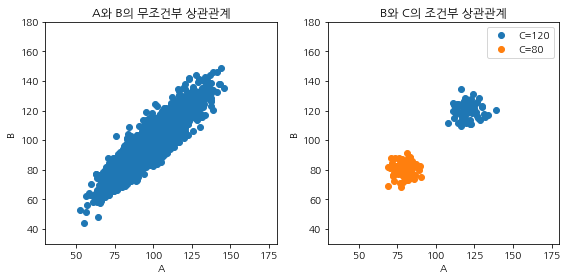

In [72]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("A와 B의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

### 사이킷런에서 제공하는 나이브베이즈 모형

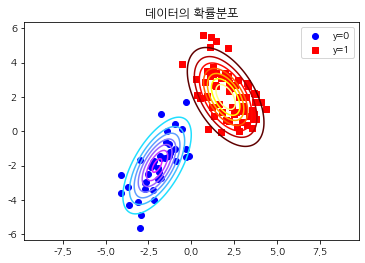

In [73]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [75]:
model_norm.classes_

array([0., 1.])

In [76]:
model_norm.class_count_

array([40., 60.])

In [77]:
model_norm.class_prior_

array([0.4, 0.6])

각 클래스에 따라  x 가 이루는 확률분포의 모수를 계산하면 다음과 같다. 
나이브 가정에 따라  x1,x2 는 독립이므로 상관관계를 구하지 않았다.

In [78]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [79]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

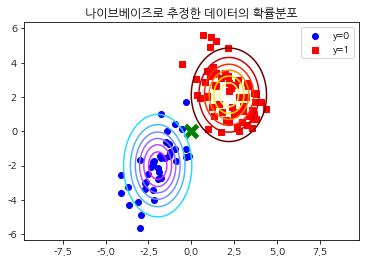

In [80]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

In [81]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

```
이 모형을 사용하여  xnew=(0,0) 인 데이터의  y 값을 예측하자. 
각 클래스값이 나올 확률은 predict_proba 메서드로 구할 수 있다. 
결과는 y=0일 확률이 0.48, y=1일 확률이 0.52이다
```

#### 구해지는 과정을 살펴보면

In [83]:
# 가능도를 구하고 
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]
likelihood

[0.006615760017637298, 0.00468796559514829]

In [84]:
# 사전확률을 곱해줌
# p(x)로 나누지 않았기 때문에 이 값은 확률은 아님
# 그러나 크기비교만 하면 되기 때문에 상관 없음
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [85]:
# 확률을 구하고 싶다면 전체확률법칙을 이용하면 됨
posterior / posterior.sum() 

array([0.48475244, 0.51524756])

#### 붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어

In [91]:
iris=load_iris()
x=iris.data
y=iris.target

In [92]:
model_norm = GaussianNB().fit(x, y)

In [93]:
model_norm.classes_

array([0, 1, 2])

In [94]:
model_norm.class_count_

array([50., 50., 50.])

In [95]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [96]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [97]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [98]:
model_norm.theta_[2], model_norm.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [99]:
y_pred=model_norm.predict(x)

In [18]:
from sklearn.metrics import classification_report

In [102]:
target_names=["class0","class1","class2"]
print(classification_report(y,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        50
      class1       0.94      0.94      0.94        50
      class2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### 스무딩

```
이 데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 
예를 들어 첫번째 메일은 정상 메일이고 1번, 4번 키워드는 포함하지 않지만 
2번, 3번 키워드를 포함한다고 볼 수 있다.
```

In [103]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
# 이 데이터를 베르누이 나이브베이즈 모형으로 예측해 보자.
from sklearn.naive_bayes import BernoulliNB

In [21]:
model_bern = BernoulliNB().fit(X, y)

In [106]:
model_bern.classes_

array([0, 1])

In [108]:
model_bern.class_count_

array([4., 6.])

In [109]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [110]:
# y=0일때 1~4번단어가 포함된 횟수
# y=1일때 1~4번단어가 포함된 횟수
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [111]:
# y=0인케이스가 4개인데 그중 2개가 1번단어를 포함  -> 확률 0.5
# y=0인케이스가 4개인데 그중 2개가 1번단어를 포함  -> 확률 0.5
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [112]:
# 스무딩 되어있었던것
model_bern.alpha

1.0

In [115]:
theta=np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [116]:
# 데이터를 0.5근처로 밀어버림

In [117]:
# 정상 메일인지 스팸메일인지 알아보기
x_new=np.array([1,1,0,0])

In [118]:
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

In [ ]:
# 정상메일일 가능성이 약 3배임을 알 수 있다.

In [1]:
from sklearn.datasets import load_digits
digits=load_digits()

In [23]:
x=digits.data
y=digits.target

In [3]:
x[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
digits.images[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
from sklearn.preprocessing import Binarizer
# 위 이미지 데이터를 Binarizer적용
x2=Binarizer(7).fit_transform(x)
# 7보다 크면 1로 바꿔줌

C:\Users\shs40\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [7]:
x2[0,:]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

(-0.5, 7.5, 7.5, -0.5)

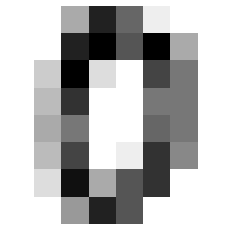

In [15]:
plt.imshow(digits.images[0,:,:],cmap=plt.cm.binary)
plt.axis("off")

In [16]:
# 이 이미지에 대해 베르누이 나이브베이즈 모형을 적용하자. 분류 결과를 분류보고서 형식으로 나타내라.

In [24]:
model_bern = BernoulliNB().fit(x, y)

In [25]:
y_pred=model_bern.predict(x)

In [27]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.76      0.62      0.68       182
           2       0.86      0.86      0.86       177
           3       0.91      0.86      0.88       183
           4       0.91      0.95      0.93       181
           5       0.93      0.82      0.87       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.70      0.82      0.75       174
           9       0.76      0.81      0.78       180

    accuracy                           0.86      1797
   macro avg       0.87      0.86      0.86      1797
weighted avg       0.87      0.86      0.86      1797



In [28]:
# BernoulliNB 클래스의 binarize인수를 사용하여 위를 풀어보기

In [29]:
x=digits.data
y=digits.target

In [31]:
model_bern = BernoulliNB(binarize=7).fit(x, y)

In [32]:
y_pred=model_bern.predict(x)

In [33]:
print(classification_report(y,y_pred))
# 왜 값이 다르지..

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [34]:
theta=np.exp(model_bern.feature_log_prob_)

In [35]:
theta

array([[0.00555556, 0.00555556, 0.15      , 0.97777778, 0.86111111,
        0.11666667, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
        0.90555556, 0.93333333, 0.82222222, 0.83888889, 0.02777778,
        0.00555556, 0.00555556, 0.1       , 0.97222222, 0.32777778,
        0.08888889, 0.92222222, 0.11111111, 0.00555556, 0.00555556,
        0.23333333, 0.93333333, 0.09444444, 0.00555556, 0.67222222,
        0.43888889, 0.00555556, 0.00555556, 0.31111111, 0.91111111,
        0.03333333, 0.00555556, 0.61666667, 0.61666667, 0.00555556,
        0.00555556, 0.05555556, 0.97222222, 0.07777778, 0.06111111,
        0.84444444, 0.36111111, 0.00555556, 0.00555556, 0.00555556,
        0.94444444, 0.71666667, 0.72777778, 0.92222222, 0.09444444,
        0.00555556, 0.00555556, 0.00555556, 0.13333333, 0.98888889,
        0.94444444, 0.3       , 0.00555556, 0.00555556],
       [0.00543478, 0.00543478, 0.10326087, 0.6576087 , 0.76630435,
        0.42391304, 0.02173913, 0.00543478, 0.00543478, 0.0

In [41]:
theta=theta.reshape(10,8,8)

(-0.5, 7.5, 7.5, -0.5)

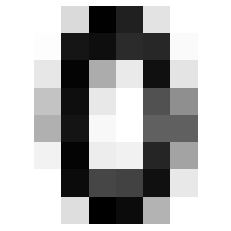

In [43]:
plt.imshow(theta[0,:,:],cmap=plt.cm.binary)
plt.axis("off")
# 이게 0의 평균적인 이미지